# DESAFIO 2. Datos de Billboard

## Paso 1. Explorar los datos

Cargá el dataset usando Pandas y comenzá a explorar los datos. Guardá en este espacio todos los procesos y análisis exploratorios que hayas hecho, tanto los preliminares como los definitivos. Por favor, indicá cuál(es) es(son) cada uno(s).

In [33]:
import pandas as pd #Importar librería Pandas
import numpy as np #Importar librería Numpy
import matplotlib.pyplot as plt #Importar librería Pyplot de MatPlotLib
import seaborn as sns #Importar librería Seaborn
%matplotlib inline
#Para que los gráficos queden bien
import matplotlib as mpl

In [2]:
dfmusic = pd.read_csv("billboard.csv", encoding = "latin1")
dfmusic

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2000,Janet,Doesn't Really Matter,4:17,Rock,2000-06-17,2000-08-26,59,52.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2000,Destiny's Child,Say My Name,4:31,Rock,1999-12-25,2000-03-18,83,83.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2000,"Iglesias, Enrique",Be With You,3:36,Latin,2000-04-01,2000-06-24,63,45.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2000,Sisqo,Incomplete,3:52,Rock,2000-06-24,2000-08-12,77,66.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,81,54.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Escribí un breve descripción de los datos. Hacé particular énfasis en los hallazagos que te parezcan relevantes hasta este punto.

In [3]:
dfmusic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 83 columns):
year               317 non-null int64
artist.inverted    317 non-null object
track              317 non-null object
time               317 non-null object
genre              317 non-null object
date.entered       317 non-null object
date.peaked        317 non-null object
x1st.week          317 non-null int64
x2nd.week          312 non-null float64
x3rd.week          307 non-null float64
x4th.week          300 non-null float64
x5th.week          292 non-null float64
x6th.week          280 non-null float64
x7th.week          269 non-null float64
x8th.week          260 non-null float64
x9th.week          253 non-null float64
x10th.week         244 non-null float64
x11th.week         236 non-null float64
x12th.week         222 non-null float64
x13th.week         210 non-null float64
x14th.week         204 non-null float64
x15th.week         197 non-null float64
x16th.week         182 no

## Paso 2. Limpieza de los datos

Empezá por una limpieza rudimentaria. Reformulá los nombres desprolijos de las variables para que tengan un criterio común, acortá los strings que sean muy largos, buscá datos missing y realizá una imputación (en caso de que te parezca que esto es necesario). En aquellos casos en que decidas que es necesario imputar, explicá cuál es el motivo y justificá la técnica que hayas utilizado para imputar.

In [4]:
import pandas as pd #Importar librería Pandas
import numpy as np #Importar librería Numpy
import matplotlib.pyplot as plt #Importar librería Pyplot de MatPlotLib
import seaborn as sns #Importar librería Seaborn
%matplotlib inline
#Para que los gráficos queden bien
dfmusic = pd.read_csv("billboard.csv", encoding = "latin1")

#renombra las columnas de las semanas:
lista_semanas = [] #se hace esta lista donde se van a ir poniendo los nombres nuevos de cada columna
for col in dfmusic.columns:
    if ".week" in col: #se fija si estamos mirando una columna de 'semana'. Si es así...
        if len(dfmusic[col].name) < 10: #toma las columnas de semanas donde el número de semana tiene un solo dígito
            lista_semanas.append(int(dfmusic[col].name[1])) #y a esa semana le da el nombre de su número de semana
        else: #a las semanas con número con dos dígitos les da también su número
            lista_semanas.append(int(dfmusic[col].name[1:3]))
    else: #para las columnas que no son semanas, les deja el mismo nombre
        lista_semanas.append(dfmusic[col].name)
dfmusic.columns = lista_semanas #las columnas ahora toman el nombre asignado en la lista lista_semanas previamente
dfmusic.dropna(axis=1, how='all', inplace = True) #remueve todas las columnas donde los valores de toda la fila son NaN.
dfmusic.fillna(value="-",axis=1,inplace = True) #reemplaza todos los valores NaN por "-". A REVISAR.
dfmusic

,year,artist.inverted,track,time,genre,date.entered,date.peaked,1,2,3,...,56,57,58,59,60,61,62,63,64,65
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63,49,...,-,-,-,-,-,-,-,-,-,-
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8,6,...,-,-,-,-,-,-,-,-,-,-
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48,43,...,-,-,-,-,-,-,-,-,-,-
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23,18,...,-,-,-,-,-,-,-,-,-,-
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47,45,...,-,-,-,-,-,-,-,-,-,-
5,2000,Janet,Doesn't Really Matter,4:17,Rock,2000-06-17,2000-08-26,59,52,43,...,-,-,-,-,-,-,-,-,-,-
6,2000,Destiny's Child,Say My Name,4:31,Rock,1999-12-25,2000-03-18,83,83,44,...,-,-,-,-,-,-,-,-,-,-
7,2000,"Iglesias, Enrique",Be With You,3:36,Latin,2000-04-01,2000-06-24,63,45,34,...,-,-,-,-,-,-,-,-,-,-
8,2000,Sisqo,Incomplete,3:52,Rock,2000-06-24,2000-08-12,77,66,61,...,-,-,-,-,-,-,-,-,-,-
9,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,81,54,44,...,25,26,31,32,37,42,42,45,50,-


Usando la función `melt()` de Pandas, reformateá el dataset para que tengan el formato "long" en lugar de "wide". Como resultado deberías haber removido la columna 72 'week' y la deberías haber reemplazado por dos: 'Week' y 'Ranking'. Ahora vas a tener múltiples entradas por canción: una por cada semana que haya estado en el ranking de Billboard.

In [5]:
import pandas as pd #Importar librería Pandas
import numpy as np #Importar librería Numpy
import matplotlib.pyplot as plt #Importar librería Pyplot de MatPlotLib
import seaborn as sns #Importar librería Seaborn
%matplotlib inline
#Para que los gráficos queden bien
dfmusic = pd.read_csv("billboard.csv", encoding = "latin1")

#renombra las columnas de las semanas:
lista_semanas = [] #se hace esta lista donde se van a ir poniendo los nombres nuevos de cada columna
for col in dfmusic.columns:
    if ".week" in col: #se fija si estamos mirando una columna de 'semana'. Si es así...
        if len(dfmusic[col].name) < 10: #toma las columnas de semanas donde el número de semana tiene un solo dígito
            lista_semanas.append(int(dfmusic[col].name[1])) #y a esa semana le da el nombre de su número de semana
        else: #a las semanas con número con dos dígitos les da también su número
            lista_semanas.append(int(dfmusic[col].name[1:3]))
    else: #para las columnas que no son semanas, les deja el mismo nombre
        lista_semanas.append(dfmusic[col].name)
dfmusic.columns = lista_semanas #las columnas ahora toman el nombre asignado en la lista lista_semanas previamente
dfmusic.dropna(axis='columns', how='all', inplace = True) #remueve todas las columnas donde los valores de toda la fila son NaN.

dfmusic = pd.melt(
    frame = dfmusic,
    id_vars = ['year', 'artist.inverted', 'track', 'time', 'genre', 'date.entered', 'date.peaked'],
    var_name = 'Week',
    value_name = 'Ranking')
dfmusic.sort_values(by = ['artist.inverted','track','Week'], axis = 'index', ascending = True, inplace = True)

dfmusic.dropna(axis = 'index', how = 'any', inplace = True) # saca las filas donde la canción ya no está en el ranking.
# A REVISAR, ya que quizás a veces hay missing value y no es porque no está más en el ranking... puede ser?
# Ojo que para hacer esto saqué la línea de código que sacaba los NaN.
dfmusic

,year,artist.inverted,track,time,genre,date.entered,date.peaked,Week,Ranking
246,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,2000-02-26,2000-03-11,1,87.0
563,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,2000-02-26,2000-03-11,2,82.0
880,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,2000-02-26,2000-03-11,3,72.0
1197,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,2000-02-26,2000-03-11,4,77.0
1514,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,2000-02-26,2000-03-11,5,87.0
1831,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,2000-02-26,2000-03-11,6,94.0
2148,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,2000-02-26,2000-03-11,7,99.0
287,2000,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,R&B,2000-09-02,2000-09-09,1,91.0
604,2000,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,R&B,2000-09-02,2000-09-09,2,87.0
921,2000,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,R&B,2000-09-02,2000-09-09,3,92.0


In [6]:
df_grouped = dfmusic.groupby(by = ['track', 'artist.inverted']).agg({'Week': [np.size, max, min], 'Ranking': min})
#np.size cuenta la cantidad de semanas que estuvo la canción en el chart
df_grouped.reset_index(inplace=True)
df_grouped.sort_values(by = 'track', ascending=True)

track    artist.inverted Week          \
                                                            size max min   
0             (Hot S**t) Country Grammar              Nelly   34  34   1   
1                         3 Little Words          Nu Flavor    9   9   1   
2                                    911       Jean, Wyclef   19  19   1   
3              A Country Boy Can Survive        Brock, Chad    3   3   1   
4                      A Little Gasoline       Clark, Terri    6   6   1   
5          A Puro Dolor (Purest Of Pain)        Son By Four   26  26   1   
6            Aaron's Party (Come Get It)      Carter, Aaron   15  15   1   
7           Absolutely (Story Of A Girl)          Nine Days   27  27   1   
8                              All Good?         De La Soul    3   3   1   
9                   All The Small Things          Blink-182   23  23   1   
10                                Amazed           Lonestar   55  64   1   
11                          American Pie            Madonna    9   9   1   
12                                Angels   Williams, Robbie   19  19   1   
13                   Another Dumb Blonde               Hoku   14  14   1   
14                  Another Nine Minutes        Yankee Grey    8   8   1   
15                              Anything              Jay-Z    8   8   1   
16                             As We Lay       Price, Kelly    8   8   1   
17    Auld Lang Syne (The Millenium Mix)            Kenny G    5   5   1   
18   Baby Don't Cry (Keep Ya Head Up II)              2 Pac    7   7   1   
19                            Baby U Are     Levert, Gerald    5   5   1   
20                           Back At One        Wills, Mark   18  18   1   
21                             Back Here              BBMak   31  31   1   
22                              Bad Boyz              Shyne   15  15   1   
23                              Bag Lady       Badu, Erkyah   20  20   1   
24                           Be With You  Iglesias, Enrique   20  20   1   
25                   Because You Love Me    Messina, Jo Dee   13  13   1   
26                            Been There       Black, Clint   20  20   1   
27                                  Bent    matchbox twenty   39  39   1   
28                           Best Friend         Puff Daddy    5   5   1   
29                    Best Of Intentions      Tritt, Travis   22  22   1   
..                                   ...                ...  ...  ..  ..   
287                      What Do You Say     McEntire, Reba   20  20   1   
288                    What I Need To Do     Chesney, Kenny   17  17   1   
289          What Means The World To You            Cam'ron   10  10   1   
290                        What You Want                DMX   20  20   1   
291                        What'Chu Like            Da Brat   20  20   1   
292                       What's My Name                DMX   11  11   1   
293                  What's Your Fantasy           Ludacris   22  22   1   
294                             Whatever              Ideal   18  18   1   
295                When You Need My Love     Worley, Darryl   15  15   1   
297                     Where I Wanna Be      Sheist, Shade    5   5   1   
296                     Where I Wanna Be      Jones, Donell   20  20   1   
298                        Where You Are   Simpson, Jessica    6   6   1   
299              Whistle While You Twurk    Ying Yang Twins   14  14   1   
300                 Who Let The Dogs Out           Baha Men   20  20   1   
301                                Whoa!          Black Rob   17  17   1   
302                                Wifey               Next   21  21   1   
303                  With Arms Wide Open              Creed   47  47   1   
304                          Without You  Dixie Chicks, The   20  20   1   
305                        Wobble Wobble           504 Boyz   18  18   1   
306                            Wonderful          Everclear   21  21   1   
307    

In [7]:
#ordenado por cantidad de semanas en el chart (Size)

df_grouped.sort_values(by = [('Week', 'size')], ascending=False)

track   artist.inverted Week  \
                                                                         size   
105                                             Higher             Creed   57   
10                                              Amazed          Lonestar   55   
150                                         Kryptonite      3 Doors Down   53   
37                                             Breathe       Hill, Faith   53   
303                                With Arms Wide Open             Creed   47   
126                                       I Wanna Know               Joe   44   
78                                 Everything You Want  Vertical Horizon   41   
27                                                Bent   matchbox twenty   39   
103                               He Wasn't Man Enough     Braxton, Toni   37   
0                           (Hot S**t) Country Grammar             Nelly   34   
114                                 I Knew I Loved You     Savage Garden   33   
88                                  Get It On.. Tonite   Jordan, Montell   32   
269                                         There U Go              Pink   32   
278                                          Try Again           Aaliyah   32   
214                                        Say My Name   Destiny's Child   32   
144                                    Jumpin' Jumpin'   Destiny's Child   32   
310                                     You Sang To Me     Anthony, Marc   32   
21                                           Back Here             BBMak   31   
49                   Case Of The Ex (Whatcha Gonna Do)               Mya   30   
39                                  Bring It All To Me            Blaque   29   
216                                  Sexual (Li Da Di)             Amber   29   
136                           Independent Women Part I   Destiny's Child   28   
250                               That's The Way It Is      Dion, Celine   28   
180                               My Love Is Your Love  Houston, Whitney   28   
274                                         Thong Song             Sisqo   28   
102                                     He Loves U Not             Dream   28   
123                                              I Try        Gray, Macy   27   
169                                      Meet Virginia             Train   27   
7                         Absolutely (Story Of A Girl)         Nine Days   27   
173                                         Most Girls              Pink   27   
..                                                 ...               ...  ...   
28                                         Best Friend        Puff Daddy    5   
64                                       Dancing Queen           A*Teens    5   
96                                          Got It All               Eve    5   
132                                            If I Am         Nine Days    5   
204                                    Private Emotion     Martin, Ricky    5   
19                                          Baby U Are    Levert, Gerald    5   
210                                             Riddle          En Vogue    4   
284                                    West Side Story               LFO    4   
47                                          Can't Stay   Hollister, Dave    4   
167                                         Me Neither     Paisley, Brad    4   
163                                 Love Sets You Free      Price, Kelly    4   
85                                         Freakin' It       Smith, Will    4   
205                                          Pull Over             Trina    4   
8                                            All Good?        De La Soul    3   
131                                     I'm Outta Love         Anastacia    3   
3                            A Country Boy Can Survive       Brock, Chad    3   
258  The Hardest Part Of Breaking Up (Is Getting Ba...           2Ge+her    3   

In [8]:
#ordenado del puesto 1 al último

df_grouped.sort_values([('Ranking', 'min')] , ascending=True).head(18)

#17 canciones llegaron al puesto 1

track      artist.inverted Week          \
                                                                size max min   
246                  Thank God I Found You        Carey, Mariah   20  20   1   
214                            Say My Name      Destiny's Child   32  32   1   
78                     Everything You Want     Vertical Horizon   41  41   1   
278                              Try Again              Aaliyah   32  32   1   
54   Come On Over Baby (All I Want Is You)  Aguilera, Christina   21  21   1   
135                             Incomplete                Sisqo   26  26   1   
136               Independent Women Part I      Destiny's Child   28  28   1   
27                                    Bent      matchbox twenty   39  39   1   
141                       It's Gonna Be Me               N'Sync   25  25   1   
24                             Be With You    Iglesias, Enrique   20  20   1   
114                     I Knew I Loved You        Savage Garden   33  33   1   
303                    With Arms Wide Open                Creed   47  47   1   
285                      What A Girl Wants  Aguilera, Christina   24  24   1   
73                   Doesn't Really Matter                Janet   24  24   1   
166                           Maria, Maria              Santana   26  26   1   
10                                  Amazed             Lonestar   55  64   1   
175                                  Music              Madonna   24  24   1   
49       Case Of The Ex (Whatcha Gonna Do)                  Mya   30  30   1   

    Ranking  
        min  
246     1.0  
214     1.0  
78      1.0  
278     1.0  
54      1.0  
135     1.0  
136     1.0  
27      1.0  
141     1.0  
24      1.0  
114     1.0  
303     1.0  
285     1.0  
73      1.0  
166     1.0  
10      1.0  
175     1.0  
49      2.0

## Paso 3. Visualizar los datos

Usando la herramienta de plotting de tu elección, generá visualizaciones que permitan seguir profundizando en el análisis exploratorio de tus datos. No hay un máximo o mínimo de gráficos. Lo que sí es requisito es que haya una lógica y un sentido en la generación de los mismos: tiene que generarse una "historia" clara a partir de los mismos. También deberías en este punto realizar un análisis preliminar de los datos: forma de la distribución, estadísticos y relaciones entre las variables

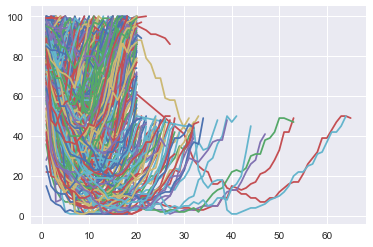

In [9]:
tracks = dfmusic['track'].unique()

for song in tracks:
    df_plot = dfmusic.loc[dfmusic['track'] == song]
    plt.plot(df_plot['Week'], df_plot['Ranking'])

# Esto nos muestra que la semana 20 es de revisión. Si a la semana 20 la canción está en el ranking x o mayor (aprox 50), se la saca de la lista.
# Entonces toda canción que dura más de 20 semanas, en la semana 20 estaba en el ranking 50 o menor.

In [10]:
#canciones que llegaron al puesto 1
dfmusic1 = dfmusic[['artist.inverted', 'track', 'Week', 'Ranking']][(dfmusic['Ranking'] == 1)] 
dfmusic1.sort_values(by='artist.inverted', ascending=True)

,artist.inverted,track,Week,Ranking
4135,Aaliyah,Try Again,14,1.0
3174,"Aguilera, Christina",Come On Over Baby (All I Want Is You),11,1.0
3491,"Aguilera, Christina",Come On Over Baby (All I Want Is You),12,1.0
3808,"Aguilera, Christina",Come On Over Baby (All I Want Is You),13,1.0
4125,"Aguilera, Christina",Come On Over Baby (All I Want Is You),14,1.0
2230,"Aguilera, Christina",What A Girl Wants,8,1.0
2547,"Aguilera, Christina",What A Girl Wants,9,1.0
3186,"Carey, Mariah",Thank God I Found You,11,1.0
8255,Creed,With Arms Wide Open,27,1.0
4444,Destiny's Child,Say My Name,15,1.0


In [11]:
#guardo las canciones en tracks
tracks = dfmusic1['track'].unique()

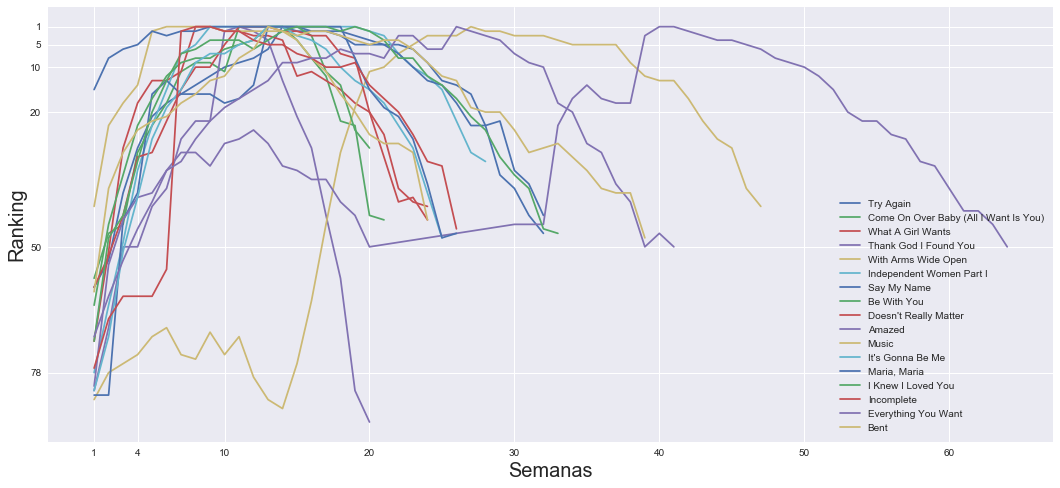

In [12]:
plt.figure(figsize = (18, 8))

for song in tracks:
    df_plot = dfmusic.loc[dfmusic['track'] == song]
    plt.plot(df_plot['Week'], df_plot['Ranking'])

plt.ylim(100,1)    
plt.yticks([78,50,20,10,5,1])
plt.xticks([60,50,40,30,20,10,4,1])
plt.xlabel("Semanas", fontsize = 20)
plt.ylabel("Ranking", fontsize = 20)
plt.axis('tight')
plt.legend(tracks)

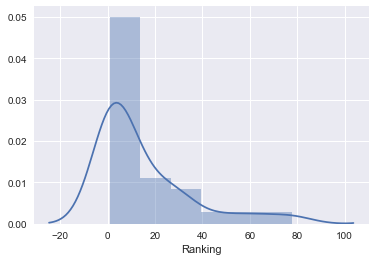

In [13]:
#la canción que más veces llegó al puesto 1
sns.distplot(dfmusic['Ranking'][(dfmusic['track']=='Independent Women Part I')])

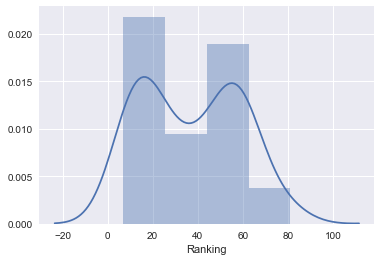

In [14]:
#la cancion que mas tiempo estuvo en el chart
sns.distplot(dfmusic['Ranking'][(dfmusic['track']=='Higher')])

In [15]:
tracks = dfmusic['track'].unique()


weeks_in_ranking = []
ranking_best = []
ranking_worse = []


for song in tracks:
    df_track = dfmusic.loc[dfmusic['track'] == song]
    weeks = len(df_track.index)
    bestranking = min(df_track['Ranking'])
    worseranking = max(df_track['Ranking'])
 
    weeks_in_ranking.append(weeks)
    ranking_best.append(bestranking)
    ranking_worse.append(worseranking)
    
weeks_in_ranking
ranking_best
ranking_worse

song_stats = pd.DataFrame({'track': tracks,  'Weeks in Billboard': weeks_in_ranking, 'Best Ranking': ranking_best, 'Worse Ranking': ranking_worse}
)
song_stats.head()

,Best Ranking,Weeks in Billboard,Worse Ranking,track
0,72.0,7,99.0,Baby Don't Cry (Keep Ya Head Up II)
1,87.0,3,92.0,The Hardest Part Of Breaking Up (Is Getting Ba...
2,3.0,53,81.0,Kryptonite
3,55.0,20,76.0,Loser
4,17.0,18,96.0,Wobble Wobble


In [16]:
#pd.merge?

In [17]:
#pd.merge(dfmusic[['track', 'artist.inverted']], song_stats, on='track', how='left').drop_duplicates()

#pd.merge(dfmusic[['track', 'artist.inverted']], song_stats, on='track', how='right')

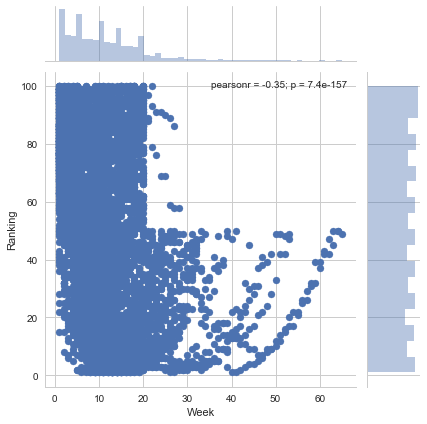

In [18]:
sns.set_style('whitegrid')
sns.jointplot(dfmusic['Week'], dfmusic['Ranking']);

In [71]:
table = dfmusic.pivot_table(values = 'Ranking', index=['track', 'artist.inverted'], columns='Week', fill_value="-")

table.head()

,Week,1,2,3,4,5,6,7,8,9,10,...,56,57,58,59,60,61,62,63,64,65
track,artist.inverted,,,,,,,,,,,,,,,,,,,,,
(Hot S**t) Country Grammar,Nelly,100,99,96,76,55,37,24,24,30,36,...,-,-,-,-,-,-,-,-,-,-
3 Little Words,Nu Flavor,97,97,89,89,94,90,99,97,98,-,...,-,-,-,-,-,-,-,-,-,-
911,"Jean, Wyclef",77,74,64,61,53,48,43,38,42,38,...,-,-,-,-,-,-,-,-,-,-
A Country Boy Can Survive,"Brock, Chad",93,75,92,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
A Little Gasoline,"Clark, Terri",75,82,88,96,99,99,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [ ]:
tracks1 = dfmusic['track'].unique()

In [ ]:
table.ix

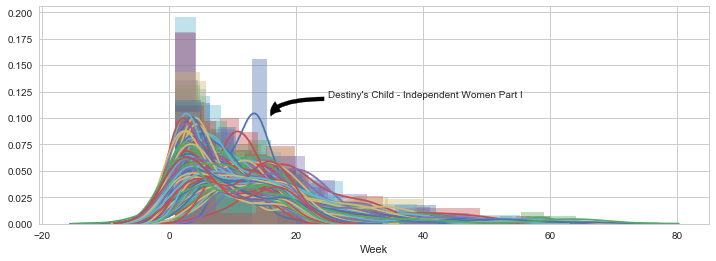

In [61]:
%matplotlib inline

fig, pepe = plt.subplots(figsize=(12, 4))

for i in range(1,100):
    pepe = sns.distplot(dfmusic['Week'][(dfmusic['Ranking']==i)]);
    
pepe.annotate("Destiny's Child - Independent Women Part I", xy=(16, 0.100), xytext=(25, 0.120),
            arrowprops=dict(connectionstyle="angle3,angleA=0,angleB=90", facecolor='black', shrink=0.03))


In [73]:
df_higher = table.loc['Higher', 'Creed']
df_destiny = table.loc["Independent Women Part I", "Destiny's Child"]

In [64]:
df_higher.head()

Week
1    81
2    77
3    73
4    63
5    61
Name: (Higher, Creed), dtype: object

KeyError: "[81 77.0 73.0 63.0 61.0 58.0 56.0 52.0 56.0 57.0 57.0 57.0 57.0 57.0 60.0\n 61.0 61.0 57.0 60.0 61.0 '-' '-' '-' '-' '-' '-' '-' '-' 43.0 41.0 34.0\n 28.0 25.0 23.0 22.0 16.0 16.0 18.0 14.0 13.0 13.0 11.0 11.0 9.0 9.0 7.0\n 7.0 9.0 9.0 12.0 14.0 16.0 17.0 17.0 21.0 26.0 29.0 32.0 39.0 39.0 43.0\n 47.0 50.0 50.0 49.0] not in index"

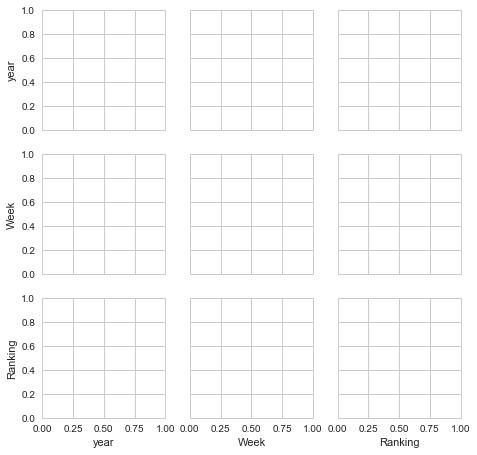

In [66]:
sns.pairplot(dfmusic, hue=df_higher, size=2.5);

In [ ]:
plot = sns.barplot( x = table2.index[0:5], y = table2['All'][0:5], ci=None)

# Agregamos el título.
plot.set_title('Nacimientos por década', fontdict = {'fontsize': 30, 'verticalalignment':'bottom'})

# Ajustamos la leyenda de los ejes.
plot.set_xlabel('Década', fontdict = {'fontsize':19})
plot.set_ylabel('Nacimientos', fontdict = {'fontsize':19});

## Paso 4. Planteo del problema

Ya tenés hecho el análisis exploratorio del dataset. Ahora es necesario realizar una formulación clara del problema que se va a abordar. Podés incorporar datos externos al dataset, si resultan necesarios para la resolución del problema formulado -solamente, acordate de poner un link a los mismos-. La creatividad es fundamental en este paso.

## Paso 5. Brainstorming para abordar el problema

En forma de listado, comenzá a pensar cuáles serían las formas en que podrías abordar el problema planteado más arriba. No tiene que ser necesariamente un código. Más bien, la idea es idear diferentes estrategias para aprovechar al máximo los datos disponibles en función del problema.

## Paso 6. Crear un reporte con los hallazgos, el código y las visualizaciones

Creá un reporte que describa cada uno de los seis pasos previos. Imaginá que estás describiendo tus datos, visualizaciones, problemas, hallazgos y conclusiones con tus pares. Deberá tener al menos 500 palabras. Y deberá contener el código utilizado para generar las visualizaciones, las pruebas estadísticas realizadas -y cualquier otro método que hayas utilizado- y el análisis e interpretación de los resultados- propiamente dicho.

## BONUS: El mismo programa para el que trabajaste te solicita escribir un white paper de al menos 500 palabras sobre el tema "cómo lidiar con la limpieza de los datos". El objetivo es que constituya una presentación para exponer ante una audiencia amplia, así que va a ser necesario incluir casos reales como ejemplos para sustentar tus planteos.

Pista: para empezar hacé una primera búsqueda en internet de artículos, blogposts, papers, videos, etc. En fin... todo lo que  te sirva para entender los desafíos que implica trabajar con datos. Este white paper debería constituir una reflexión original y personal acerca de lo aprendido en esta semana.